In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pickle

In [71]:
movies = pd.read_csv('C://Users//hp//Desktop//My Folder//Trial//movies.csv')
tags = pd.read_csv('C://Users//hp//Desktop//My Folder//Trial//tags.csv')
ratings = pd.read_csv('C://Users//hp//Desktop//My Folder//Trial//ratings.csv')

In [72]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [73]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [74]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [75]:
movies.shape

(9742, 3)

In [76]:
ratings.shape

(100836, 4)

In [77]:
tags.shape

(3683, 4)

In [78]:
movies['genres'] = movies['genres'].str.replace('|',' ',regex=True)

In [79]:
len(movies.movieId.unique())

9742

In [80]:
len(ratings.movieId.unique())

9724

In [81]:
r = ratings

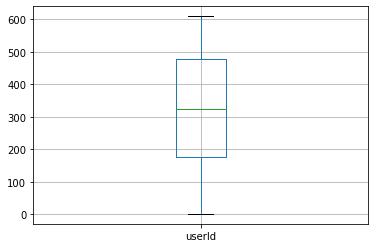

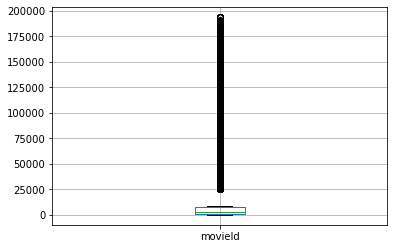

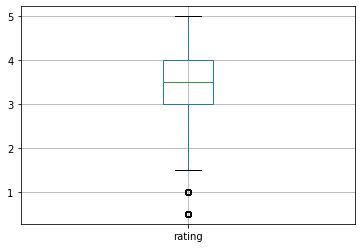

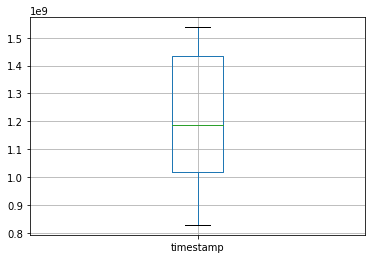

In [82]:
%matplotlib inline
for column in r:
    plt.figure()
    r.boxplot([column])

In [83]:
ratings_f = ratings.groupby('userId').filter(lambda x: len(x) >= 35)
movie_list_rating = ratings_f.movieId.unique().tolist()

In [84]:
len(ratings_f.movieId.unique())/len(movies.movieId.unique()) * 100

99.35331554095667

In [85]:
len(ratings_f.userId.unique())/len(ratings.userId.unique()) * 100

76.22950819672131

In [86]:
movies = movies[movies.movieId.isin(movie_list_rating)]

In [87]:
Mapping_file = dict(zip(movies.title.tolist(), movies.movieId.tolist()))

In [88]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [89]:
tags.drop(['timestamp'],1, inplace=True)
ratings_f.drop(['timestamp'],1, inplace=True)

In [90]:
mixed = pd.merge(movies, tags, on='movieId', how='left')
mixed.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,336.0,pixar
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,474.0,pixar
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,567.0,fun
3,2,Jumanji (1995),Adventure Children Fantasy,62.0,fantasy
4,2,Jumanji (1995),Adventure Children Fantasy,62.0,magic board game


In [91]:
mixed.fillna("", inplace=True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(lambda x: "%s" % ' '.join(x)))
Final = pd.merge(movies, mixed, on='movieId', how='left')
Final ['metadata'] = Final[['tag', 'genres']].apply(lambda x: ' '.join(x), axis = 1)
Final[['movieId','title','metadata']].head()

,movieId,title,metadata
0,1,Toy Story (1995),pixar pixar fun Adventure Animation Children C...
1,2,Jumanji (1995),fantasy magic board game Robin Williams game A...
2,3,Grumpier Old Men (1995),moldy old Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),pregnancy remake Comedy


In [92]:
Final.shape

(9679, 5)

In [93]:
Final.loc[1, "metadata"]

'fantasy magic board game Robin Williams game Adventure Children Fantasy'

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Final['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=Final.index.tolist())
print(tfidf_df.shape)

(9679, 1675)


In [95]:
tfidf_df.shape

(9679, 1675)

In [96]:
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


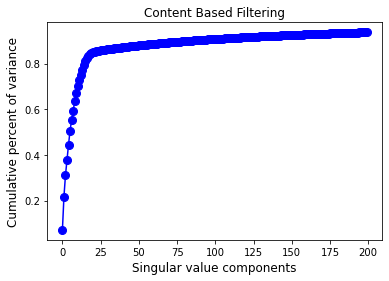

In [97]:
# Compress with SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='blue')
plt.title('Content Based Filtering')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [98]:
n = 200 
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=Final.title.tolist())

In [99]:
latent_matrix.shape

(9679, 200)

In [100]:
ratings_f.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [101]:
ratings_f1 = pd.merge(movies[['movieId']], ratings_f, on="movieId", how="right")

In [102]:
ratings_f2 = ratings_f1.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)

In [103]:
ratings_f2.head()

userId,1,3,4,5,6,7,8,9,10,11,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
len(ratings_f.movieId.unique())

9679

In [105]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix_2 = svd.fit_transform(ratings_f2)
latent_matrix_2_df = pd.DataFrame(
                             latent_matrix_2,
                             index=Final.title.tolist())

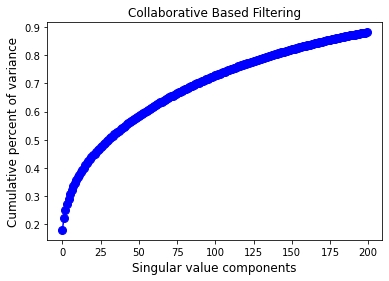

In [106]:
# plot variance expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='blue')
plt.title('Collaborative Based Filtering')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [107]:
from sklearn.metrics.pairwise import cosine_similarity
# take the latent vectors for a selected movie from both content 
# and collaborative matrixes
a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc['Toy Story (1995)']).reshape(1, -1)

# calculate the similartity of this movie with the others in the list
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# an average measure of both content and collaborative 
hybrid = ((score_1 + score_2)/2.0)

# form a data frame of similar movies 
dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
similar = pd.DataFrame(dictDf, index = latent_matrix_1_df.index )

#sort it on the basis of either: content, collaborative or hybrid, 
# here : content
similar.sort_values('collaborative', ascending=False, inplace=True)

similar.head(11)

,content,collaborative,hybrid
Toy Story (1995),1.000000,1.000000,1.000000
Toy Story 2 (1999),0.791663,0.667812,0.729737
Jurassic Park (1993),0.088033,0.661334,0.374684
Star Wars: Episode IV - A New Hope (1977),0.023041,0.635586,0.329313
Independence Day (a.k.a. ID4) (1996),0.060032,0.628237,0.344135
Forrest Gump (1994),0.001190,0.627630,0.314410
Shrek (2001),0.408592,0.618278,0.513435
Star Wars: Episode VI - Return of the Jedi (1983),0.052557,0.616766,0.334662
"Lion King, The (1994)",0.120501,0.609304,0.364903
Apollo 13 (1995),0.032719,0.606281,0.319500


In [108]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [109]:
# instantiate a reader and read in our rating data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_f[['userId','movieId','rating']], reader)

# train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)

# check the accuracy using Root Mean Square Error
accuracy.rmse(predictions)
#accuracy.mae(predictions)

RMSE: 0.8739


0.8739379410335855

In [110]:
def pred_user_rating(ui):
    if ui in ratings_f.userId.unique():
        ui_list = ratings_f[ratings_f.userId == ui].movieId.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}        
        predictedL = []
        for i, j in d.items():     
            predicted = algorithm.predict(ui, j)
            predictedL.append((i, predicted[3])) 
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings'])
        pdf.sort_values('ratings', ascending=False, inplace=True)  
        pdf.set_index('movies', inplace=True)    
        return pdf.head(10)        
    else:
        print("User Id does not exist in the list!")
        return None

In [111]:
user_id = 1
pred_user_rating(user_id)

,ratings
movies,
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),5.0
"Bridge on the River Kwai, The (1957)",5.0
"Boondock Saints, The (2000)",5.0
"Shawshank Redemption, The (1994)",5.0
Evil Dead II (Dead by Dawn) (1987),5.0
WALL·E (2008),5.0
Glory (1989),5.0
"Beautiful Mind, A (2001)",5.0
"Manchurian Candidate, The (1962)",5.0


In [112]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(ratings_f1,test_size=0.25)
ratings_train = train_data.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)
ratings_test = test_data.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)

In [113]:
train_final, test_final = train_test_split(Final,test_size=0.25)

In [114]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_train = svd.fit_transform(ratings_train)
#latent_train_df = pd.DataFrame(latent_train)

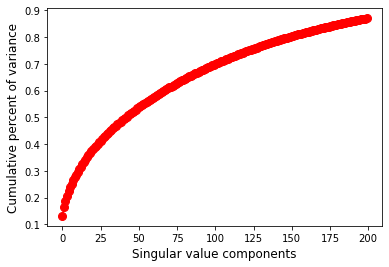

In [115]:
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [116]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_test = svd.fit_transform(ratings_test)
latent_test_df = pd.DataFrame(latent_test)

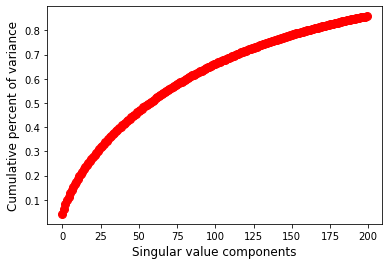

In [117]:
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [118]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction,ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction,ground_truth))

In [119]:
from sklearn.metrics.pairwise import pairwise_distances
ms=pairwise_distances(latent_train.T,metric='cosine')
mp=latent_train.dot(ms)/np.array([np.abs(ms).sum(axis=1)])
mp

array([[ 2.46159236e-01,  4.11298805e-01,  3.36095367e-01, ...,
         3.86338057e-01,  3.85461914e-01,  3.84147984e-01],
       [-7.63347087e-02, -2.63273756e-03, -3.82789020e-02, ...,
        -9.93387432e-03, -1.13783844e-02, -1.05845438e-02],
       [ 7.85394661e-02,  1.33258535e-01,  1.07802709e-01, ...,
         1.12928666e-01,  1.11353376e-01,  1.14883618e-01],
       ...,
       [ 1.96619309e-02,  1.91600186e-02,  2.00392345e-02, ...,
         2.10655402e-02,  2.19269046e-02,  1.76239353e-02],
       [ 1.96619309e-02,  1.91600186e-02,  2.00392345e-02, ...,
         2.10655402e-02,  2.19269046e-02,  1.76239353e-02],
       [-1.41259907e-03, -2.04727538e-03, -7.95264510e-04, ...,
        -7.24983963e-04, -7.33940153e-05,  4.40445482e-04]])

In [120]:
accuracy = rmse(mp,latent_test)*1.96

In [121]:
accuracy

0.9827309628005124

In [122]:
final_train, final_test = train_test_split(Final,test_size = 0.25)

In [123]:
tfidf_train = TfidfVectorizer(stop_words='english')
tfidf_train_matrix = tfidf_train.fit_transform(final_train['metadata'])
tfidf_train_df = pd.DataFrame(tfidf_train_matrix.toarray(), index=final_train.index.tolist())

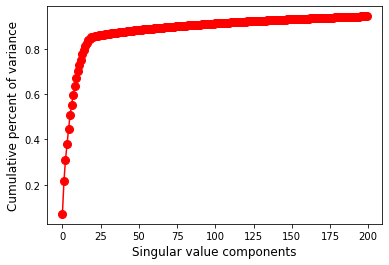

In [124]:
svd = TruncatedSVD(n_components=200)
lm_train = svd.fit_transform(tfidf_train_df)
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [125]:
tfidf_test = TfidfVectorizer(stop_words='english')
tfidf_test_matrix = tfidf_test.fit_transform(final_test['metadata'])
tfidf_test_df = pd.DataFrame(tfidf_test_matrix.toarray(), index=final_test.index.tolist())

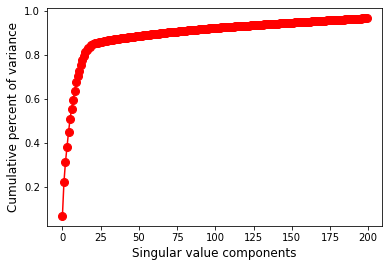

In [126]:
svd = TruncatedSVD(n_components=200)
lm_test = svd.fit_transform(tfidf_test_df)
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [127]:
ms1=pairwise_distances(lm_train.T,metric='cosine')
mp1=lm_train.dot(ms1)/np.array([np.abs(ms1).sum(axis=1)])
mp1

array([[ 1.92666310e-03,  2.36130851e-03,  2.54541709e-03, ...,
         2.82650444e-03,  2.86134413e-03,  2.76084392e-03],
       [ 2.12173528e-05,  5.15121156e-04, -3.21485682e-04, ...,
         1.43239882e-03,  1.43709975e-03,  1.43254952e-03],
       [-6.23305745e-03, -1.88645890e-03, -4.41588219e-03, ...,
        -4.04082893e-03, -4.04118995e-03, -4.03922888e-03],
       ...,
       [ 2.41601036e-04,  3.16950064e-03,  2.24850240e-03, ...,
         1.66135791e-03,  1.66368903e-03,  1.66549597e-03],
       [-5.80225490e-03,  6.91209839e-04, -1.08165348e-03, ...,
        -2.66519248e-03, -2.66468374e-03, -2.66355235e-03],
       [-4.71719233e-03, -1.53103283e-03, -1.41364072e-03, ...,
        -1.35593026e-03, -1.35665885e-03, -1.35640903e-03]])

In [128]:
accuracy1 = rmse(mp1,lm_test)*1.96

In [129]:
accuracy1

0.13684071645812024

In [130]:
accuracy2 = (accuracy1+accuracy)/2.0

In [131]:
accuracy2

0.5597858396293163

In [132]:
user_id = 1
df=pred_user_rating(user_id)

In [133]:
df

,ratings
movies,
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),5.0
"Bridge on the River Kwai, The (1957)",5.0
"Boondock Saints, The (2000)",5.0
"Shawshank Redemption, The (1994)",5.0
Evil Dead II (Dead by Dawn) (1987),5.0
WALL·E (2008),5.0
Glory (1989),5.0
"Beautiful Mind, A (2001)",5.0
"Manchurian Candidate, The (1962)",5.0


In [134]:
df.to_csv('C://Users//hp//Desktop//file1.csv')

In [135]:
a = df.index.tolist()

In [136]:
a

['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)',
 'Bridge on the River Kwai, The (1957)',
 'Boondock Saints, The (2000)',
 'Shawshank Redemption, The (1994)',
 'Evil Dead II (Dead by Dawn) (1987)',
 'WALL·E (2008)',
 'Glory (1989)',
 'Beautiful Mind, A (2001)',
 'Manchurian Candidate, The (1962)',
 'North by Northwest (1959)']

In [137]:
Final

,movieId,title,genres,tag,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar pixar fun,pixar pixar fun Adventure Animation Children C...
1,2,Jumanji (1995),Adventure Children Fantasy,fantasy magic board game Robin Williams game,fantasy magic board game Robin Williams game A...
2,3,Grumpier Old Men (1995),Comedy Romance,moldy old,moldy old Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance,,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake,pregnancy remake Comedy
...,...,...,...,...,...
9674,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,,Action Animation Comedy Fantasy
9675,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,,Animation Comedy Fantasy
9676,193585,Flint (2017),Drama,,Drama
9677,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation,,Action Animation


In [138]:
Mapping_file.items()

dict_items([('Toy Story (1995)', 1), ('Jumanji (1995)', 2), ('Grumpier Old Men (1995)', 3), ('Waiting to Exhale (1995)', 4), ('Father of the Bride Part II (1995)', 5), ('Heat (1995)', 6), ('Sabrina (1995)', 7), ('Tom and Huck (1995)', 8), ('Sudden Death (1995)', 9), ('GoldenEye (1995)', 10), ('American President, The (1995)', 11), ('Dracula: Dead and Loving It (1995)', 12), ('Balto (1995)', 13), ('Nixon (1995)', 14), ('Cutthroat Island (1995)', 15), ('Casino (1995)', 16), ('Sense and Sensibility (1995)', 17), ('Four Rooms (1995)', 18), ('Ace Ventura: When Nature Calls (1995)', 19), ('Money Train (1995)', 20), ('Get Shorty (1995)', 21), ('Copycat (1995)', 22), ('Assassins (1995)', 23), ('Powder (1995)', 24), ('Leaving Las Vegas (1995)', 25), ('Othello (1995)', 26), ('Now and Then (1995)', 27), ('Persuasion (1995)', 28), ('City of Lost Children, The (Cité des enfants perdus, La) (1995)', 29), ('Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 30), ('Dangerous Minds (1995)', 31), ('